# CS 321 - Extra Credit Assignment
## CYK Algorithm Recognizer
Alexander Jones

Description: Implement the CYK Algorithm as a recognizer to determine if a string is in a language.
Program Requirements:
- Input a grammar G in CNF. You can use any method to input the grammar. YOur program will be tested with grammars of size: 5-10 variables, 10-20 productions, 2-6 terminals.
- Input: a string w
- Output: True if $w \in L(G)$, otherwise false
- Extend your program to a parser that also constructs a parse tree for w.

### Grammar Class

#### Description:
The `Grammar` class is designed to represent a Context-Free Grammar (CFG) in Chomsky Normal Form (CNF). It encapsulates the grammar's variables, terminals, productions, and the start variable. This class also validates the grammar to ensure that it adheres to the CNF structure.

#### Low-Level Abstraction:
Here's an in-depth look at the different components of the `Grammar` class:

- **Attributes**:
  - `variables`: A dictionary mapping each variable to a unique index.
  - `terminals`: A set containing all the terminal symbols.
  - `productions`: A dictionary with variables as keys, and a set of productions as values.
  - `start_variable`: Index of the start variable.
  - `variables_reverse`: A dictionary with the reverse mapping of variables to their indexes.

- **Constructor `__init__(self, variables, terminals, productions, start_variable)`**:
  - Initializes the grammar with given variables, terminals, productions, and start variable.
  - Validates the grammar by checking if it is in CNF.
  - If the start variable is not in the variables list, it is appended.

- **Method `is_in_cnf(self)`**:
  - Validates whether the grammar is in CNF by checking the structure of the productions.
  - Returns `True` if the grammar is in CNF; otherwise, returns `False`.

- **Method `add_production(self, variable_index, production)`**:
  - Adds a production to the grammar.
  - Validates the production before adding it to the dictionary of productions.

#### Usage:
The `Grammar` class can be instantiated by providing the variables, terminals, productions, and start variable as arguments. The class will ensure that the grammar follows the CNF structure, and it will raise a ValueError if any of the constraints are violated.

```python
variables = ['S', 'A', 'B']
terminals = ['a', 'b']
productions = [('S', ('A', 'B')), ('A', ('a',)), ('B', ('b',))]
start_variable = 'S'
grammar = Grammar(variables, terminals, productions, start_variable)


In [527]:
# Required libraries
required_libraries = ['networkx', 'matplotlib']

# Check if the libraries are installed, and if not, install them
for library in required_libraries:
    try:
        __import__(library)
    except ImportError:
        # If for some reason this doesn't work, change to 
        # !pip install {library}
        %pip install {library}

import networkx as nx
import matplotlib.pyplot as plt
import random
import string

In [528]:
class Grammar:
    def __init__(self, variables, terminals, productions, start_variable):
        self.variables = {var: i for i, var in enumerate(variables)}
        self.terminals = set(terminals)
        self.productions = {self.variables[var]: set() for var in variables}
        self.start_variable = self.variables[start_variable]
        self.variables_reverse = {v: k for k, v in self.variables.items()} # Add this line
        
        for variable, production in productions:
            self.add_production(self.variables[variable], production)

        if not self.is_in_cnf():
            raise ValueError("Provided grammar is not in CNF")
        
        # Ensure start_variable is in variables list
        if self.start_variable not in self.variables:
            variables.append(start_variable)

    def is_in_cnf(self):
        # Check if the productions are in CNF
        for var, prods in self.productions.items():
            for prod in prods:
                if len(prod) == 1 and prod[0] not in self.terminals:
                    return False
                if len(prod) == 2 and not all(p in self.variables for p in prod):
                    return False
                if len(prod) > 2:
                    return False
        return True

    def add_production(self, variable_index, production):
        if variable_index not in self.variables.values():
            raise ValueError(f"Variable {variable_index} is not defined in the grammar")
        
        if len(production) == 1 and production[0] not in self.terminals:
            raise ValueError(f"Terminal {production[0]} is not defined in the grammar")
        
        if len(production) == 2 and not all(p in self.variables or p in self.terminals for p in production):
            raise ValueError(f"Variables {production} are not defined in the grammar")
        
        if len(production) > 2:
            raise ValueError(f"Production {production} is not in CNF")

        self.productions[variable_index].add(production)


### CYKRecognizer Class

#### Description:
The `CYKRecognizer` class is responsible for recognizing whether a given string is part of the language defined by a given grammar. It leverages the Cocke-Younger-Kasami (CYK) algorithm, which is a dynamic programming algorithm for parsing strings in a context-free grammar.

#### Low-Level Abstraction:

- **Attributes**:
  - `grammar`: The grammar object, an instance of the `Grammar` class, that defines the language.

- **Constructor `__init__(self, grammar)`**:
  - Initializes the recognizer with a given grammar.

- **Method `recognize(self, w)`**:
  - Recognizes if the given string `w` is in the language defined by the grammar.
  - Validates if all symbols in the input string are in the grammar's terminals.
  - Utilizes a 4-dimensional list `P` for dynamic programming.
  - Consists of two main parts:
      - Base case: Initializes the diagonal of the `P` table based on the input string and grammar's productions.
      - Dynamic programming: Fills the `P` table by considering different splits of the string, applying the grammar's productions.
  - Returns a tuple containing a boolean result indicating if the string is in the language, and the CYK table `P` if the result is `True`.

#### Usage:
The `CYKRecognizer` class is instantiated by providing a `Grammar` object. Then the `recognize` method can be called with a string to determine whether it is part of the language defined by the grammar.

```python
grammar = Grammar(variables, terminals, productions, start_variable)
recognizer = CYKRecognizer(grammar)
result, cyk_table = recognizer.recognize(w)


In [529]:
class CYKRecognizer:
    def __init__(self, grammar):
        self.grammar = grammar

    def recognize(self, w):
        if not all(symbol in self.grammar.terminals for symbol in w):
            raise ValueError("Input string contains symbols not in the grammar")
        n = len(w)
        num_vars = len(self.grammar.variables)
        P = [[[[False, None] for _ in range(num_vars)] for _ in range(n)] for _ in range(n)]

        # Base case:
        for s in range(n):
            for A, productions in self.grammar.productions.items():
                for production in productions:
                    if len(production) == 1 and production[0] == w[s]:
                        P[s][s][A] = [True, production]

        # Dynamic programming:
        for length in range(2, n+1):
            for start in range(n - length + 1):
                end = start + length - 1
                for split in range(start, end):
                    for A, productions in self.grammar.productions.items():
                        for production in productions:
                            if len(production) == 2:
                                B, C = production
                                B_index = self.grammar.variables[B]
                                C_index = self.grammar.variables[C]
                                if P[start][split][B_index][0] and P[split+1][end][C_index][0]:
                                    P[start][end][A] = [True, (production, (split, [B_index, C_index]))]

        result = P[0][n-1][self.grammar.start_variable][0]
        return result, P if result else None


### RandomCNFGrammar Class

#### Description:
The `RandomCNFGrammar` class is a subclass of the `Grammar` class. It generates a random context-free grammar (CFG) in Chomsky Normal Form (CNF). The class also provides a method to generate a random string from the language defined by the randomly generated grammar.

#### Low-Level Abstraction:

- **Constructor `__init__(self)`**:
  - Generates random variables, terminals, productions, and a start variable to form a grammar in CNF.
  - Variables are labeled as `V0`, `V1`, ..., `Vn`, with a random count between 5 and 10.
  - Terminals are randomly selected lowercase letters with a count between 2 and 6.
  - Productions are created ensuring each variable has at least one terminal production and adding a random mix of terminal and variable productions.
  - The superclass's constructor (`Grammar`) is then called with the generated variables, terminals, productions, and start variable.

- **Method `generate_random_string(self, max_depth=10)`**:
  - Generates a random string from the grammar by recursively expanding the start variable according to the productions.
  - `max_depth` parameter limits the recursion depth, avoiding infinite loops for recursive grammars.
  - Returns the generated random string.

#### Usage:
The `RandomCNFGrammar` class is instantiated without any arguments. The `generate_random_string` method can be called to produce a random string from the language defined by the randomly generated grammar.

```python
random_grammar = RandomCNFGrammar()
random_string = random_grammar.generate_random_string()

Example:
Calling the RandomCNFGrammar() constructor will generate a random CFG in CNF. Invoking generate_random_string() will return a random string from the language defined by that grammar.

Note:
The RandomCNFGrammar class depends on the parent Grammar class and must be used in the context where the Grammar class is defined. The random nature of this class means that the actual grammar and its language can vary each time an instance is created.

In [530]:
class RandomCNFGrammar(Grammar):
    def __init__(self):
        variables = [f'V{i}' for i in range(random.randint(5, 10))]
        terminals = [random.choice(string.ascii_lowercase) for _ in range(random.randint(2, 6))]
        productions = []
        start_variable = random.choice(variables)

        # Ensure each variable has at least one terminal production
        for variable in variables:
            terminal = random.choice(terminals)
            productions.append((variable, (terminal,)))

        for _ in range(random.randint(10, 20)):
            variable = random.choice(variables)
            production_type = random.choice(['terminal', 'variables'])
            
            if production_type == 'terminal':
                terminal = random.choice(terminals)
                productions.append((variable, (terminal,)))
            else:
                var1 = random.choice(variables)
                var2 = random.choice(variables)
                productions.append((variable, (var1, var2)))

        # Pass the start_variable directly without converting to index
        super().__init__(variables, terminals, productions, start_variable)

    def generate_random_string(self, max_depth=10):
        def expand(variable_index, depth):
            if depth > max_depth:
                return ""
            productions = [p for p in self.productions[variable_index]]
            production = random.choice(productions)
            result = ""
            for symbol in production:
                if symbol in self.terminals:
                    result += symbol
                else:
                    result += expand(self.variables[symbol], depth + 1)
            return result

        return expand(self.start_variable, 0)  # Pass the start variable index, not name




### ParseTreeBuilder Class

#### Description:
The `ParseTreeBuilder` class constructs and renders a parse tree for a given string using the CYK algorithm's table. It's used to visualize how a string is derived from a given grammar in Chomsky Normal Form (CNF).

#### Low-Level Abstraction:

- **Constructor `__init__(self, grammar, input_string, cyk_table)`**:
  - Takes a `grammar`, an `input_string`, and a `cyk_table` generated by the CYK algorithm.
  - Initializes a directed graph to represent the parse tree using the NetworkX library.

- **Method `build_tree(self, i, j, A)`**:
  - Recursive function to construct the parse tree from the CYK table.
  - Takes indices `i` and `j`, representing the substring boundaries, and `A`, the current variable.
  - Identifies and adds production rules to the tree, branching down into non-terminal or terminal productions.
  - Terminal productions add leaves to the tree, representing the terminals in the input string.

- **Method `render_tree(self)`**:
  - Initiates the tree building process from the start variable and constructs the tree.
  - Renders the tree using the `networkx` and `matplotlib` libraries, showing the structure of the parse tree graphically.

#### Usage:
The `ParseTreeBuilder` class is used after running the CYK recognition algorithm. It requires the grammar, input string, and CYK table.

```python
tree_builder = ParseTreeBuilder(grammar, input_string, cyk_table)
tree_builder.render_tree()


In [531]:

class ParseTreeBuilder:
    def __init__(self, grammar, input_string, cyk_table):
        self.grammar = grammar
        self.input_string = input_string
        self.cyk_table = cyk_table
        self.graph = nx.DiGraph()

    def build_tree(self, i, j, A):
        parent_label = f'{i},{j},{A}'
        A_index = self.grammar.variables[A]
        for k in range(i, j):
            for production in self.grammar.productions[A_index]:  # Access by index
                if len(production) == 1:
                    # Handle terminal production
                    continue
                B, C = production
                B_index = self.grammar.variables[B]
                C_index = self.grammar.variables[C]
                if self.cyk_table[i][k][B_index][0] and self.cyk_table[k+1][j][C_index][0]:
                    left_label = f'{i},{k},{B}'
                    right_label = f'{k+1},{j},{C}'
                    self.graph.add_edge(parent_label, left_label)
                    self.graph.add_edge(parent_label, right_label)
                    self.graph.nodes[parent_label]['label'] = A
                    self.graph.nodes[left_label]['label'] = B
                    self.graph.nodes[right_label]['label'] = C
                    self.build_tree(i, k, B)
                    self.build_tree(k + 1, j, C)
                    return

        # Terminal case
        self.graph.add_node(f'{i},{j},{A}', label=self.input_string[i])

    def render_tree(self):
        start_variable_name = self.grammar.variables_reverse[self.grammar.start_variable] # Use self.grammar instead of random_cnf_grammar
        self.build_tree(0, len(self.input_string) - 1, start_variable_name)
        pos = nx.spring_layout(self.graph)
        labels = {node: self.grammar.variables_reverse.get(data['label'], data['label']) for node, data in self.graph.nodes(data=True)}

        nx.draw(self.graph, pos, labels=labels, with_labels=True, node_size=1000)
        plt.show()




#### Overview:
The following code cell demonstrates the entire process of defining a random context-free grammar (CNF), recognizing a random string using the CYK algorithm, and visualizing the parse tree if the string is part of the language.

#### Details:

1. **Generate a Random CNF Grammar**:
   - Creates an instance of the `RandomCNFGrammar` class, which constructs a random grammar in CNF with a set number of variables, terminals, and productions.

2. **Print Grammar Details**:
   - Prints the details of the generated random grammar, including variables, terminals, productions, and the start variable.

3. **Create a CYK Recognizer**:
   - Instantiates the `CYKRecognizer` class, passing in the random grammar. This will be used to recognize strings according to the grammar.

4. **Generate a Random String**:
   - Calls the `generate_random_string` method of `RandomCNFGrammar` to create a random string that should be part of the language defined by the grammar.

5. **Check if the String is in the Language**:
   - Uses the `recognize` method of the CYK recognizer to determine if the random string is in the language.
   - If the string is recognized, it constructs the parse tree using the `ParseTreeBuilder` class and renders the tree.
   - If the string is not recognized, it prints a corresponding message.

#### Usage:
This code cell can be run as a standalone script to visualize the entire process, from defining a random grammar to recognizing a string and visualizing its derivation. It provides a practical way to see how the grammar classes, CYK recognizer, and parse tree builder work together.

#### Dependencies:
The code depends on previously defined classes, including `RandomCNFGrammar`, `CYKRecognizer`, and `ParseTreeBuilder`. Ensure that these classes are defined in the same environment where the code cell is executed.

#### Output:
The code prints details of the randomly generated grammar, the random string, and whether the string is in the language. If the string is in the language, it also displays a graphical representation of the parse tree.

#### You may have to run this cell a couple of times, as sometimes it will randomly generate a single character string. Go crazy!


Variables: {'V0': 0, 'V1': 1, 'V2': 2, 'V3': 3, 'V4': 4, 'V5': 5, 'V6': 6, 'V7': 7, 'V8': 8}
Terminals: {'d', 's', 'i', 'q', 'p'}
Productions: {0: [('i',), ('p',), ('q',)], 1: [('d',), ('p',)], 2: [('V6', 'V8'), ('V8', 'V6'), ('s',), ('p',)], 3: [('V6', 'V4'), ('d',), ('p',), ('V1', 'V1')], 4: [('i',)], 5: [('i',), ('p',), ('V7', 'V3')], 6: [('V5', 'V3'), ('d',), ('V6', 'V1')], 7: [('s',), ('q',)], 8: [('p',)]}
Start Variable: 0
Random string: p
The string 'p' is in the language: True


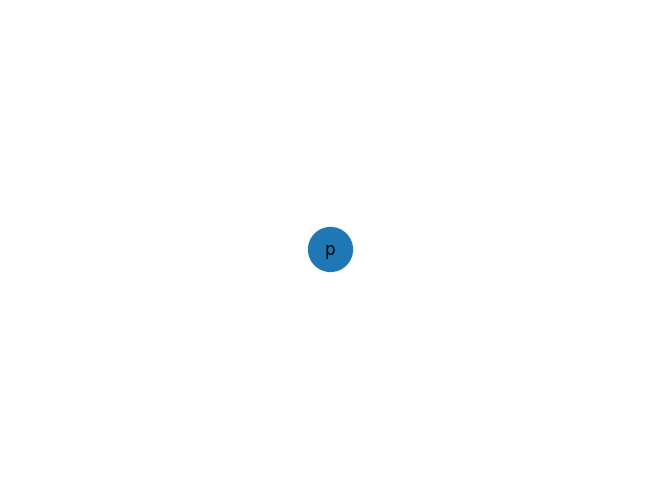

In [540]:
# Generate a random CNF grammar
random_cnf_grammar = RandomCNFGrammar()
# Reverse variables dictionary for easier label handling
random_cnf_grammar.variables_reverse = {v: k for k, v in random_cnf_grammar.variables.items()}


# Print the grammar details
print("Variables:", random_cnf_grammar.variables)
print("Terminals:", random_cnf_grammar.terminals)
print("Productions:", {var: list(prods) for var, prods in random_cnf_grammar.productions.items()})
print("Start Variable:", random_cnf_grammar.start_variable)

# Create a CYK recognizer for the random grammar
test_recognizer = CYKRecognizer(random_cnf_grammar)

# Generate a random string in the language
random_string = random_cnf_grammar.generate_random_string(10) # Change this number to generate longer strings
print(f"Random string: {random_string}")

# Check if the string is in the language
test_result = test_recognizer.recognize(random_string)

#print(f"The string '{random_string}' is in the language: {test_result}")
test_result, cyk_table = test_recognizer.recognize(random_string)
if test_result:
    print(f"The string '{random_string}' is in the language: {test_result}")
    tree_builder = ParseTreeBuilder(random_cnf_grammar, random_string, cyk_table)
    tree_builder.render_tree()
else:
    print(f"The string '{random_string}' is not in the language")


The string 'ab' is in the language: True


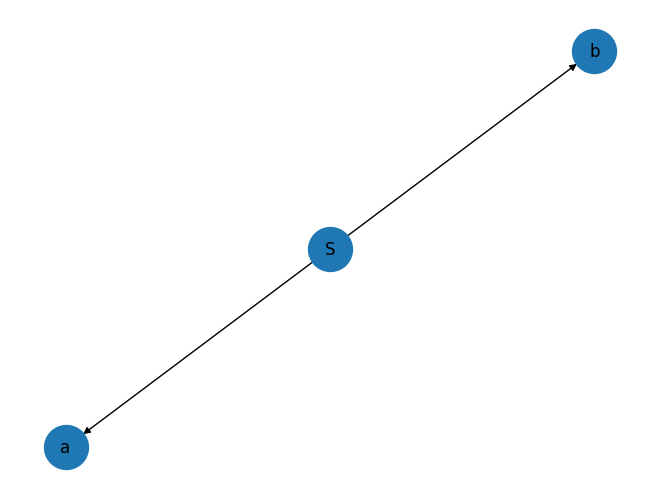

In [533]:
# Define the grammar
variables = ['S', 'A', 'B']
terminals = ['a', 'b']
productions = [
    ('S', ('A', 'B')),
    ('A', ('a',)),
    ('B', ('b',))
]
start_variable = 'S'

# Create a Grammar object
grammar = Grammar(variables, terminals, productions, start_variable)

# Create a CYKRecognizer object
recognizer = CYKRecognizer(grammar)

# Test string
w = "ab"

# Check if the string is in the language
result, cyk_table = recognizer.recognize(w)
if result:
    print(f"The string '{w}' is in the language: {result}")
    tree_builder = ParseTreeBuilder(grammar, w, cyk_table)
    tree_builder.render_tree()
else:
    print(f"The string '{w}' is not in the language")

The string 'abb' is in the language: True


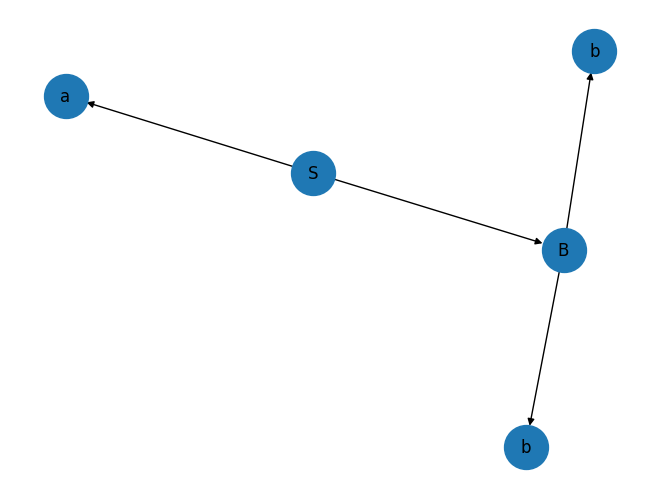

In [534]:
# Define the grammar
variables1 = ['S', 'A', 'B']
terminals1 = ['a', 'b']
productions1 = [
    ('S', ('A', 'B')),
    ('A', ('a',)),
    ('B', ('B', 'B')),
    ('B', ('b',))
]
start_variable1 = 'S'

# Create a Grammar object
grammar1 = Grammar(variables1, terminals1, productions1, start_variable1)

# Create a CYKRecognizer object
recognizer1 = CYKRecognizer(grammar1)

# Test string
w1 = "abb"

# Check if the string is in the language
result1, cyk_table1 = recognizer1.recognize(w1)
if result1:
    print(f"The string '{w1}' is in the language: {result1}")
    tree_builder1 = ParseTreeBuilder(grammar1, w1, cyk_table1)
    tree_builder1.render_tree()
else:
    print(f"The string '{w1}' is not in the language")


In [535]:
# Define the grammar
variables2 = ['S', 'A', 'B', 'C']
terminals2 = ['a', 'b']
productions2 = [
    ('S', ('A', 'C')),
    ('A', ('A', 'B')),
    ('A', ('a',)),
    ('B', ('b',)),
    ('C', ('B', 'B'))
]
start_variable2 = 'S'

# Create a Grammar object
grammar2 = Grammar(variables2, terminals2, productions2, start_variable2)

# Create a CYKRecognizer object
recognizer2 = CYKRecognizer(grammar2)

# Test string
w2 = "aabb"

# Check if the string is in the language
result2, cyk_table2 = recognizer2.recognize(w2)
if result2:
    print(f"The string '{w2}' is in the language: {result2}")
    tree_builder2 = ParseTreeBuilder(grammar2, w2, cyk_table2)
    tree_builder2.render_tree()
else:
    print(f"The string '{w2}' is not in the language")


The string 'aabb' is not in the language


The string 'aaab' is in the language: True


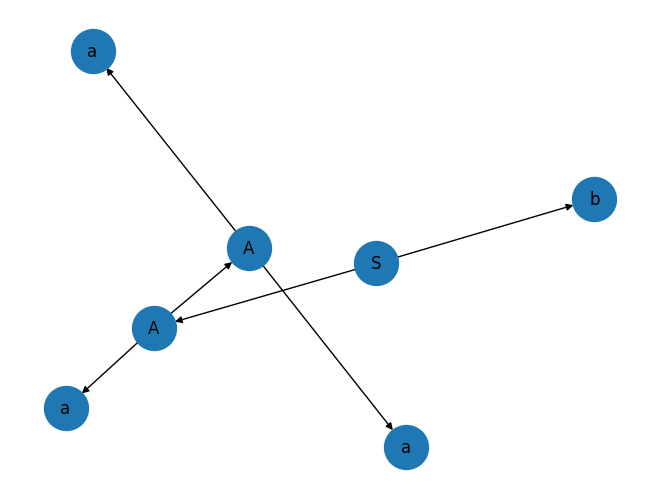

In [536]:
variables3 = ['S', 'A', 'B']
terminals3 = ['a', 'b']
productions3 = [
    ('S', ('A', 'B')),
    ('A', ('A', 'A')),
    ('A', ('a',)),
    ('B', ('b',))
]
start_variable3 = 'S'

grammar3 = Grammar(variables3, terminals3, productions3, start_variable3)
recognizer3 = CYKRecognizer(grammar3)

w3 = "aaab"
result3, cyk_table3 = recognizer3.recognize(w3)
if result3:
    print(f"The string '{w3}' is in the language: {result3}")
    tree_builder3 = ParseTreeBuilder(grammar3, w3, cyk_table3)
    tree_builder3.render_tree()
else:
    print(f"The string '{w3}' is not in the language")


In [537]:
variables4 = ['S', 'A', 'B', 'C']
terminals4 = ['a', 'b']
productions4 = [
    ('S', ('A', 'C')),
    ('A', ('A', 'B')),
    ('A', ('a',)),
    ('B', ('b',)),
    ('C', ('C', 'C')),
    ('C', ('a',))
]
start_variable4 = 'S'

grammar4 = Grammar(variables4, terminals4, productions4, start_variable4)
recognizer4 = CYKRecognizer(grammar4)

w4 = "aabaa"
result4, cyk_table4 = recognizer4.recognize(w4)
if result4:
    print(f"The string '{w4}' is in the language: {result4}")
    tree_builder4 = ParseTreeBuilder(grammar4, w4, cyk_table4)
    tree_builder4.render_tree()
else:
    print(f"The string '{w4}' is not in the language")


The string 'aabaa' is not in the language


## Blank Testing Cell

This cell is for the user to define a grammar and test the application. Guidelines are in the comments. The cell is expected to fail if left blank.

In [538]:
# Define your grammar by entering your own variables, terminals, productions, and start variable
variablesX = [] # Replace with your list of variables, e.g., ['S', 'A', 'B']
terminalsX = [] # Replace with your list of terminals, e.g., ['a', 'b']
productionsX = [] # Replace with your list of productions, e.g., [('S', ('A', 'B')), ('A', ('a',))]
start_variableX = '' # Replace with your start variable, e.g., 'S'

# Create a Grammar object using your defined grammar
grammarX = Grammar(variablesX, terminalsX, productionsX, start_variableX)

# Create a CYKRecognizer object
recognizerX = CYKRecognizer(grammarX)

# Test string
wX = "" # Replace with your test string, e.g., "aabaa"

# Check if the string is in the language
resultX, cyk_tableX = recognizerX.recognize(wX)
if resultX:
    print(f"The string '{wX}' is in the language: {resultX}")
    tree_builderX = ParseTreeBuilder(grammarX, wX, cyk_tableX)
    tree_builderX.build()
else:
    print(f"The string '{wX}' is not in the language")


KeyError: ''

#### Earley Parsing Algorithm

The Earley parsing algorithm is a chart parsing algorithm that can handle any context-free grammar. It operates on input strings from left to right to efficiently parse a string and build a parse tree.

The algorithm uses a data structure called a chart to keep track of all possible parsings. The chart contains states which represent partial candidate parses of the input. As the algorithm processes the input, it fills the chart with new states representing partial parses. When a complete parse of the input is found, the corresponding state contains the full parsed result. The key to Earley's efficiency is how it handles recursion and repetitive parsing of the same input sections. By storing partial results in the chart, it avoids re-processing input sections and only parses each section once rather than multiple times recursively.

```EARLEY-PARSE(grammar G, input string w)
  initialize chart to empty
  add axiom rule S->.S to chart
  
  for each position p in w from 1 to |w|:
    for each state s in chart[p-1]:
      if s represents rule A->α.Bβ:
        add state B->.B to chart[p] (predict)
      if s represents rule B->γ. :
        for each state t in chart[q] representing A->αB.β:
          add state A->αBβ. to chart[p] (complete) 
    for each terminal a matching input w[p]:
      add state a->a. to chart[p] (scan) 
      
  return chart[|w|]
  ```

  The Earley parsing algorithm differs from the CYK algorithm in a few key ways:

While CYK operates bottom-up on all possible spans of the input, Earley is fundamentally top-down, building parses according to the grammar rules. Earley directly follows the grammar to guide its parsing process. At each input position, it predicts possible next symbols and completes partial parses according to completed sub-parses. This top-down approach driven by the grammar allows Earley to parse arbitrary context-free grammars efficiently.

In contrast, CYK relies on dynamic programming and memoization to avoid repeated work. It builds complete parse trees for all possible spans of the input. While powerful, CYK is limited to only handling context-free grammars in Chomsky normal form.

Additionally, Earley uses a chart data structure to store partial parse results and progress, whereas CYK builds two-dimensional parse tables. The Earley chart allows parsing state to be tracked and shared efficiently during the parse.

Overall, Earley parsing takes a more grammar-directed approach compared to CYK's exhaustive bottom-up searching through all spans. This allows Earley parsers to handle any context-free grammar, though CYK remains more efficient for simpler grammars.